In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
from scipy.optimize import curve_fit
from scipy.special import erfc

Text(0, 0.5, 'Концентрация, [-]')

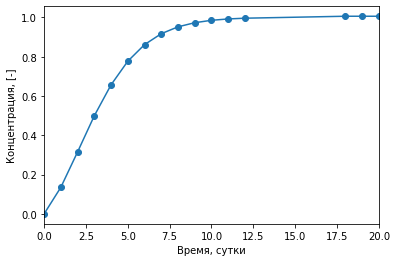

In [5]:
bound = 0.14# g/l
x = 1.3 #meters
num_data_points = 13 # number of data points including initial conditions
list1 = [10.7,9.272,7.373,5.429,3.766,2.497,1.606,1.018,0.649,0.427,0.298,0.225,0.185]
#num_data_points = 12 # number of data points including initial conditions
#list1 = [10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44]#, 0.23, 0.08]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
for i in range(18,1000):
#    print(i)
    df.loc[i] = [i,0.08]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())


# Print the output. 
df 
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,20)
ax.set_ylabel('Концентрация, [-]')

In [6]:
df[:20]

,TimeDays,"C, g/l",c^
0,0.0,10.700,-0.000000
1,1.0,9.272,0.135227
2,2.0,7.373,0.315057
3,3.0,5.429,0.499148
4,4.0,3.766,0.656629
5,5.0,2.497,0.776799
6,6.0,1.606,0.861174
7,7.0,1.018,0.916856
8,8.0,0.649,0.951799
9,9.0,0.427,0.972822


In [7]:
v = 0.14 
x = 1.3 
time = df['TimeDays'].to_numpy()
xdata = df['c^'].to_numpy()

In [8]:
def func(time, n,alpha):
    result = []
    result_list = []
    
#    print(chislitel)
    t0 = 0
#    t0 = n*x/v
    for t in time:
#        print(t)
        if t0<t:
            chislitel = v*t - x*n
            znamenatel = 2*np.sqrt(v**2/alpha*(1-t0/t)*n*t)
            result = 1 - 0.5*erfc(chislitel/znamenatel)
            
        else:
            result = 0
#        print(result)
        result_list.append(result)
    return result_list

In [9]:
def func1(time, x1, x2, x3, x4, x5):
    result = []
    result_list = []
    
#    print(chislitel)
#    t0 = 0
#    t0 = n*x/v

    result = x1 + x2*time + x3*time*time+x4*time*time*time + x5*time*time*time*time
           
#    print(result)
#    result_list.append(result)
    return result

In [12]:
#func(time, 0.33345209, 0.31591204)
#plt.plot(func(df['TimeDays'],0.1,0.01))

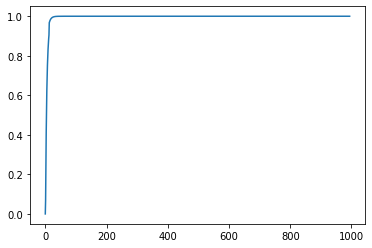

In [11]:
plt.plot(func(time, 0.4, 0.24))

In [27]:
popt, pcov = curve_fit(func1, time, xdata, p0 = [ 0.4, 1, 1, 1,1])#, bounds=(0, [1., 0.5]))
popt

array([ 8.63090094e-01,  1.61568895e-03, -5.60909291e-06,  7.44384523e-09,
       -3.33984848e-12])

[0, 20, 0, 1.1]

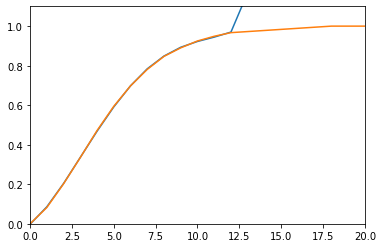

In [28]:
plt.plot(time, func1(time, -0.00233466,  0.0672037 ,  0.02426847, -0.00341219,  0.00012381))
plt.plot(df['TimeDays'], df['c^'])
plt.axis([0, 20, 0, 1.1])

[0, 20, 0, 1.1]

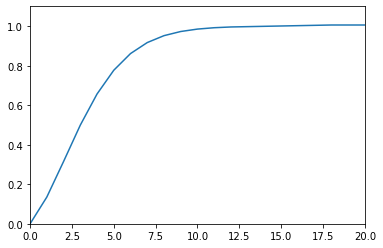

In [13]:
plt.plot(df['TimeDays'], df['c^'])
plt.axis([0, 20, 0, 1.1])

[0, 20, 0, 1.1]

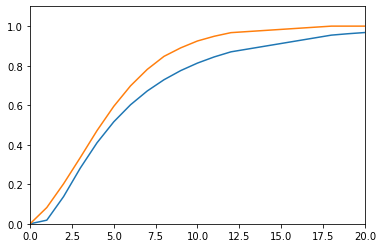

In [37]:
new_C = func(time,  0.403, 0.239)
plt.plot(time, new_C)
plt.plot(time, df['c^'])
plt.axis([0, 20, 0, 1.1])

In [24]:
s = 6# number of p
power = 1/(s-1)
q = pow(((20/20)*(5/20)), power)
q = round(q,2)
t_C_max = 14# time of max concentration
tmax = t_C_max/5
tmax = round(tmax,2)

#t = [tmax  *q**i for i in range(s)]
t = [0.579,0.765,1.009, 1.331,1.755,2.316]
t_rounded = [round(num, 1) for num in t]
p = [1/i for i in t]
p

[1.7271157167530227,
 1.3071895424836601,
 0.9910802775024778,
 0.7513148009015778,
 0.5698005698005698,
 0.43177892918825567]

p = 1.7271157167530227 int = 0.07441243809340392
p = 1.3071895424836601 int = 0.10664385455682115
p = 0.9910802775024778 int = 0.14733848197432434
p = 0.7513148009015778 int = 0.19857154820204895
p = 0.5698005698005698 int = 0.26087131237671546
p = 0.43177892918825567 int = 0.33330937407962896


[0, 20, 0, 0.1]

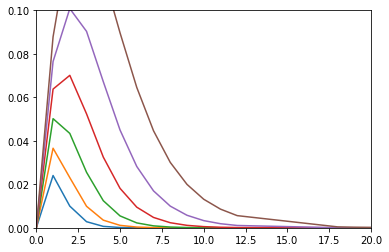

In [25]:
integrated = []
for count in p:
#    exp_ = np.exp((-count)*time)
#    df['laplace'] = new_C*exp_
#    print('exponent = ' + str(df['laplace']))
    exp_ = np.exp((-count)*df['TimeDays'])
    df['laplace'] = df['c^']*exp_
    plt.plot(df['laplace'])
    
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
#    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
    s = integrate.simps(df['laplace'], x=df['TimeDays'], even='avg')
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated
plt.axis([0, 20, 0, 0.1])

In [26]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,1.727116,0.074412
1,1.307190,0.106644
2,0.991080,0.147338
3,0.751315,0.198572
4,0.569801,0.260871
5,0.431779,0.333309


In [27]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,1.727116,0.074412,2.165110,0.797703
1,1.307190,0.106644,1.865217,0.700824
2,0.991080,0.147338,1.595852,0.621035
3,0.751315,0.198572,1.347171,0.557698
4,0.569801,0.260871,1.119773,0.508853
5,0.431779,0.333309,0.915570,0.471596


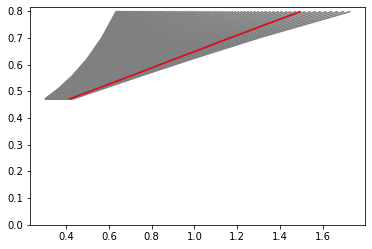

In [28]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = (df_final['p, days^-1'].round(3)/(1+count1*df_final['p, days^-1'].round(3))).round(3)
    df_final['result'] = df_final['result'].round(3)
    ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
df_final['result'] = df_final['result'].round(3)
ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'red')

In [29]:
df_results.loc[df_results['R2'].idxmax()]

A3           0.090000
R2           0.999962
slope        0.303293
intercept    0.344995
Name: 9, dtype: float64

In [20]:
df_final['result'] = df_final['p, days^-1'].round(3)/(1+0.2*df_final['p, days^-1'].round(3))
#df_final['result'] = df_final['result'].round(3)
#slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'].round(3))
df_final['result']
#A3_res = 0.05
#r_value**2

0    0.333209
1    0.401030
2    0.480022
3    0.573654
4    0.682211
5    0.807479
6    0.951417
7    1.113788
Name: result, dtype: float64

In [30]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.2898594028724532
k = 0.07894751568346849
alpha = 0.23418966764419788


0     0.082418
1     0.202381
2     0.335165
3     0.471612
4     0.594322
5     0.697802
6     0.781136
7     0.847070
8     0.890110
9     0.924908
10    0.948718
11    0.967033
Name: c^, dtype: float64

In [154]:
func(time, 0.4, 0.24)

[0.01870113664792239,
 0.13908591150258132,
 0.2846068247368556,
 0.41329035071967857,
 0.519536285649473,
 0.6057766328677646,
 0.6756048138218991,
 0.7322648798945145,
 0.7784032249663999,
 0.8161171459882437,
 0.8470578713534711,
 0.8725274178413394]

In [312]:
def func1(time, n,D, n0):
    result = []
    result_list = []
    
#    print(chislitel)
#    t0 = 0
    t0 = n0*x/v
    for t in time:
        if t == 0:
            result = 0 
        elif t0<t:
            chislitel = x*100*np.sqrt(D*n)
            znamenatel = 2*v*np.sqrt(t-t0)
            result = erfc(chislitel/znamenatel)
            
        else:
            result = 0
#        print(result)
        result_list.append(result)
    return result_list

In [313]:
v = 0.1 
x = 1.2
time = df['TimeDays'].to_numpy()
xdata = df['c^'].to_numpy()

In [317]:
popt, pcov = curve_fit(func1, time, xdata, p0 = [ 0.01, 7e-04, 0.2], bounds=(0, [0.1, 0.001, 1]))
popt

array([2.79945160e-03, 1.72925367e-04, 3.05642516e-01])

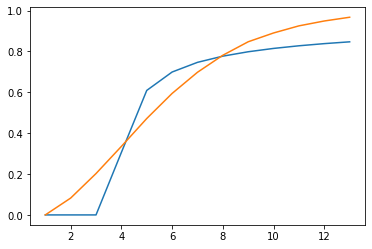

In [318]:
plt.plot(time, func1(time, *popt))
plt.plot(time, xdata)

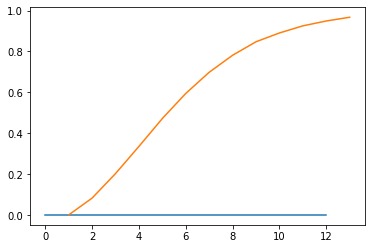

In [307]:
plt.plot(func1(time, 0.35481701, 0.35484433))
plt.plot(time, xdata)

In [415]:
df['c^']

0     -0.000000
1      0.082418
2      0.202381
3      0.335165
4      0.471612
         ...   
995    1.000000
996    1.000000
997    1.000000
998    1.000000
999    1.000000
Name: c^, Length: 995, dtype: float64

In [391]:
time

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153., 154., 15

In [443]:
math.pow(time,3)

TypeError: only size-1 arrays can be converted to Python scalars